# 데이터 로드

In [179]:
import pandas as pd
import numpy as np

In [180]:
data = pd.read_csv('movies_train.csv')

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

In [181]:
print(data.shape)
data.head()

(600, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [183]:
data.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [184]:
data.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [185]:
data.screening_rat.unique()

array(['청소년 관람불가', '15세 관람가', '전체 관람가', '12세 관람가'], dtype=object)

# 전처리

In [186]:
features = ['genre', 'screening_rat', 'distributor']

In [187]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in features:
    data[feature] = le.fit_transform(data[feature])

In [188]:
data

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,80,10,2012-11-22,96,3,조병옥,NaN,0,91,2,23398
1,내부자들,21,2,2015-11-19,130,3,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,21,10,2013-06-05,123,1,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,6,11,2012-07-12,101,2,구자홍,23894.00,2,20,6,217866
4,불량남녀,96,11,2010-11-04,108,1,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,6,4,2014-08-13,111,3,심성보,3833.00,1,510,7,1475091
596,파파로티,21,4,2013-03-14,127,1,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,17,1,2010-09-30,99,3,김대현,NaN,0,123,4,2475
598,악의 연대기,51,2,2015-05-14,102,1,백운학,NaN,0,431,4,2192525


In [189]:
import datetime

data['release_time'] = data['release_time'].apply(pd.to_datetime)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    int32         
 2   genre           600 non-null    int32         
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    int32         
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(5), object(2)
memory usage: 49.3+ KB


In [191]:
data.insert(2, 'year', data['release_time'].apply(lambda x : x.year))

In [192]:
data.insert(3, 'month', data['release_time'].apply(lambda x : x.month))

In [154]:
def year_month(datetime):
    return str(datetime.year)+"-"+str(datetime.month)

data.insert(2, 'year_month', data['release_time'].apply(year_month))

In [193]:
data

,title,distributor,year,month,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,80,2012,11,10,2012-11-22,96,3,조병옥,NaN,0,91,2,23398
1,내부자들,21,2015,11,2,2015-11-19,130,3,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,21,2013,6,10,2013-06-05,123,1,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,6,2012,7,11,2012-07-12,101,2,구자홍,23894.00,2,20,6,217866
4,불량남녀,96,2010,11,11,2010-11-04,108,1,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,6,2014,8,4,2014-08-13,111,3,심성보,3833.00,1,510,7,1475091
596,파파로티,21,2013,3,4,2013-03-14,127,1,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,17,2010,9,1,2010-09-30,99,3,김대현,NaN,0,123,4,2475
598,악의 연대기,51,2015,5,2,2015-05-14,102,1,백운학,NaN,0,431,4,2192525


In [194]:
date = ['release_time']

In [195]:
data_copy = data.drop(date, axis=1)

In [196]:
data_copy

,title,distributor,year,month,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,80,2012,11,10,96,3,조병옥,NaN,0,91,2,23398
1,내부자들,21,2015,11,2,130,3,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,21,2013,6,10,123,1,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,6,2012,7,11,101,2,구자홍,23894.00,2,20,6,217866
4,불량남녀,96,2010,11,11,108,1,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,6,2014,8,4,111,3,심성보,3833.00,1,510,7,1475091
596,파파로티,21,2013,3,4,127,1,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,17,2010,9,1,99,3,김대현,NaN,0,123,4,2475
598,악의 연대기,51,2015,5,2,102,1,백운학,NaN,0,431,4,2192525


In [197]:
data_copy.isnull().sum()

title               0
distributor         0
year                0
month               0
genre               0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [198]:
data_copy.drop('dir_prev_bfnum', axis=1, inplace=True)

In [199]:
data_copy

,title,distributor,year,month,genre,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,80,2012,11,10,96,3,조병옥,0,91,2,23398
1,내부자들,21,2015,11,2,130,3,우민호,2,387,3,7072501
2,은밀하게 위대하게,21,2013,6,10,123,1,장철수,4,343,4,6959083
3,나는 공무원이다,6,2012,7,11,101,2,구자홍,2,20,6,217866
4,불량남녀,96,2010,11,11,108,1,신근호,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,6,2014,8,4,111,3,심성보,1,510,7,1475091
596,파파로티,21,2013,3,4,127,1,윤종찬,1,286,6,1716438
597,살인의 강,17,2010,9,1,99,3,김대현,0,123,4,2475
598,악의 연대기,51,2015,5,2,102,1,백운학,0,431,4,2192525


In [200]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          600 non-null    object
 1   distributor    600 non-null    int32 
 2   year           600 non-null    int64 
 3   month          600 non-null    int64 
 4   genre          600 non-null    int32 
 5   time           600 non-null    int64 
 6   screening_rat  600 non-null    int32 
 7   director       600 non-null    object
 8   dir_prev_num   600 non-null    int64 
 9   num_staff      600 non-null    int64 
 10  num_actor      600 non-null    int64 
 11  box_off_num    600 non-null    int64 
dtypes: int32(3), int64(7), object(2)
memory usage: 49.3+ KB


In [201]:
features = ['title', 'director']

In [202]:
data_copy.drop(features, axis=1, inplace=True)

In [203]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   distributor    600 non-null    int32
 1   year           600 non-null    int64
 2   month          600 non-null    int64
 3   genre          600 non-null    int32
 4   time           600 non-null    int64
 5   screening_rat  600 non-null    int32
 6   dir_prev_num   600 non-null    int64
 7   num_staff      600 non-null    int64
 8   num_actor      600 non-null    int64
 9   box_off_num    600 non-null    int64
dtypes: int32(3), int64(7)
memory usage: 40.0 KB


## 시각화

<AxesSubplot:xlabel='year_month', ylabel='box_off_num'>

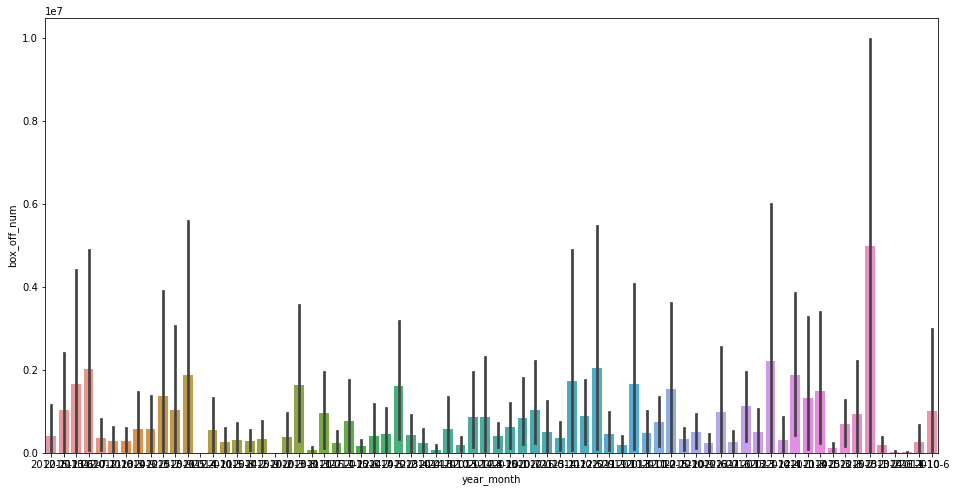

In [171]:
fig = plt.subplots(figsize=(16,8))
sns.barplot(data=data_copy, x='year_month', y='box_off_num')

# 데이터 분리

In [204]:
X_data = data_copy.iloc[:, :-1]
y_data = data_copy.iloc[:, -1]

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2, random_state=11)

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats      # 과학 계산 라이브러리

from sklearn.datasets import load_boston
%matplotlib inline

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [208]:
# Linear Regression OLS로 학습/예측/평가 수행
# Linear Regression 
lr = LinearRegression()

# 학습
lr.fit(X_train , y_train )

# 예측
y_preds = lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 3665092835438.502, RMSE : 1914443.218
Variance score : 0.340
